In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
import numpy as np
import sys
import matplotlib.pyplot as plt
import yaml
import cv2
from scipy.spatial.transform import Rotation
from matplotlib.patches import Rectangle
from tqdm import tqdm


sys.path.append('/home/schiavazza/code/hpe/')

from vicon_recordings.src.projection import ProjectionHelper
from vicon_recordings.src.data_helpers import DvsLabeler, DvsHelper, C3dHelper
from vicon_recordings.src import vis_utils, utils

In [2]:
# import the DVS data
dvs_file_path = '/home/schiavazza/data/hpe/vicon_recordings/giovanna/5'
dvs_helper = DvsHelper(dvs_file_path)
# define the point labels to use
labels = [
    'P001:RASI',
    'P001:LASI',
    'P001:STRN',
    'P001:CLAV',
    'P001:RFHD',
    'P001:LFHD',
    # 'LSHO',
    'P001:RSHO',
    'P001:RELB',
    'P001:RUPA',
    'P001:LELB',
    'P001:LFRM',
    'P001:RKNE',
    'P001:RTIB'
]
dvs_helper.read_points_labels('../data/points_stefano5.yml');
labels_times = dvs_helper.labeled_points['times'][:1]
print(labels_times)

[1.8]


In [3]:

# load c3d vicon data
c3d_file_path = '/home/schiavazza/data/hpe/vicon_recordings/EDPR_hpe/human_pose_estimation/P001/session/stefano5.c3d'
c3d_helper = C3dHelper(c3d_file_path)
print(c3d_helper.reader.point_labels)
c3d_helper.reader.frame_count


['P001:LFHD                     ' 'P001:RFHD                     '
 'P001:LBHD                     ' 'P001:RBHD                     '
 'P001:C7                       ' 'P001:T10                      '
 'P001:CLAV                     ' 'P001:STRN                     '
 'P001:RBAK                     ' 'P001:LSHO                     '
 'P001:LUPA                     ' 'P001:LELB                     '
 'P001:LFRM                     ' 'P001:LWRA                     '
 'P001:LWRB                     ' 'P001:LFIN                     '
 'P001:RSHO                     ' 'P001:RUPA                     '
 'P001:RELB                     ' 'P001:RFRM                     '
 'P001:RWRA                     ' 'P001:RWRB                     '
 'P001:RFIN                     ' 'P001:LASI                     '
 'P001:RASI                     ' 'P001:LPSI                     '
 'P001:RPSI                     ' 'P001:LTHI                     '
 'P001:LKNE                     ' 'P001:LTIB                  

/home/schiavazza/code/hpe/vicon_recordings/venv/lib/python3.10/site-packages/c3d/c3d.py:1219: UserWarning: No analog data found in file.
  warnings.warn('No analog data found in file.')
/home/schiavazza/code/hpe/vicon_recordings/src/data_helpers.py:46: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, count = scipy.stats.mode(n_points)


1343

In [4]:

# labels_times = [8.0, 9.0, 10.0, 11.0, 12.0, 13.0]
vicon_labeled_frames = c3d_helper.get_frame_time(labels_times)
print(c3d_helper.frame_times)
vicon_points = c3d_helper.get_vicon_points(vicon_labeled_frames, labels)
vicon_points_mark = c3d_helper.transform_points_to_marker_frame(vicon_points)

# vicon_points_mark = vicon_points
print(f"times from dvs labels: {dvs_helper.labeled_points['times']}")
print(f"times from vicon labels: {vicon_points_mark['times']}")
print(c3d_helper.start_time)
c3d_helper.find_start_time()
c3d_helper.calculate_frame_times()
# are we finding the correct marker frame of reference?


[-2.05       -2.03999255 -2.0299851  ... 11.3599851  11.36999255
 11.38      ]
385
times from dvs labels: [1.8, 3.0, 4.0]
times from vicon labels: [1.80286885]
[2.05]


array([-2.05      , -2.03999255, -2.0299851 , ..., 11.3599851 ,
       11.36999255, 11.38      ])

In [5]:

proj_helper = ProjectionHelper(vicon_points_mark, dvs_helper.labeled_points)
proj_helper.import_camera_calbration('../data/temp_calib.txt');
# tmp = np.copy(proj_helper.image_points[:13])
# proj_helper.image_points[:13] = proj_helper.image_points[13:]
# proj_helper.image_points[13:] = tmp
# proj_helper.world_points = np.flip(proj_helper.world_points, axis=0)


Number of 3d points: 13
Number of image points: 13


In [6]:

T = proj_helper.find_R_t()
# T = proj_helper.T_to_transform(T)
print(T)
# T[2, -1] = 0
print(Rotation.from_matrix(T[:3, :3]).as_euler('xyz'))
print(Rotation.from_matrix(T[:3, :3]).as_matrix())
(T[:-1, -1])



  message: Desired error not necessarily achieved due to precision loss.
  success: False
   status: 2
      fun: 166.2465961117795
        x: [ 7.138e-02  3.828e-01 -1.720e-01 -4.460e+02 -4.860e+02
            -1.158e+02]
      nit: 89
      jac: [ 6.110e+02  5.178e+02  2.130e+02  2.435e-01 -2.885e-01
            -7.658e-02]
 hess_inv: [[ 6.581e-04 -1.016e-03 ...  1.700e+00 -2.499e-01]
            [-1.016e-03  1.574e-03 ... -2.631e+00  3.794e-01]
            ...
            [ 1.700e+00 -2.631e+00 ...  4.409e+03 -6.648e+02]
            [-2.499e-01  3.794e-01 ... -6.648e+02  2.060e+02]]
     nfev: 1342
     njev: 190
[[ 9.13949104e-01  1.58748526e-01  3.73491553e-01 -4.45955517e+02]
 [-1.44453596e-01  9.87297579e-01 -6.61562497e-02 -4.85970912e+02]
 [-3.79249513e-01  6.51124727e-03  9.25271533e-01 -1.15801789e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
[ 0.007037    0.38898508 -0.15675757]
[[ 0.9139491   0.15874853  0.37349155]
 [-0.1444536   0.98729758 -0.0

/home/schiavazza/code/hpe/vicon_recordings/src/projection.py:250: UserWarning: Desired error not necessarily achieved due to precision loss.
  warnings.warn(result.message)


array([-445.95551672, -485.97091186, -115.80178875])

dict with only the points
(50, 4)
(13, 4)


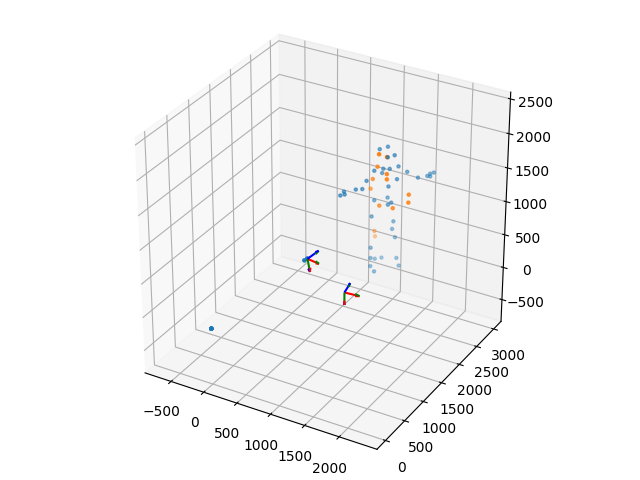

In [7]:

%matplotlib widget
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_box_aspect([1.0, 1.0, 1.0])

zero_Tr = np.eye(4)

vis_utils.plot_points_3d(ax, 
        proj_helper.transform_points(
            c3d_helper.points_dict_to_array(c3d_helper.get_points_dict(769)), zero_Tr))

for i in range(len(vicon_labeled_frames)):
    marker_T = np.linalg.inv(c3d_helper.markers_T[vicon_labeled_frames[i]])
    vis_utils.plot_points_3d(ax,
                            proj_helper.transform_points(
                                proj_helper.world_points[i*13:(1+i)*13],
                                marker_T
                            )
    )

# vis_utils.plot_frame(ax, zero_Tr)

for Tr in c3d_helper.markers_T.values():
    vis_utils.plot_frame(ax, np.linalg.inv(Tr))
    vis_utils.plot_frame(ax, np.linalg.inv(Tr) @ np.linalg.inv(T))

vis_utils.set_axes_equal(ax)
plt.tight_layout()
plt.show()


In [8]:

plt.close()


In [9]:

# proj_helper.undistort_image_points()
projected_points = proj_helper.project_to_frame(
    proj_helper.transform_points(
        proj_helper.world_points, T
        )
    )


No such comm: c88f22b9caf84cb7b8dfb59272c88a4f


No such comm: 483e736e534646c2a4ac69b9bc3db059


No such comm: aa3dc40a5c0546709523707ead060bcc


No such comm: 9f22a53e2bc1487e942fc8613b805e5f


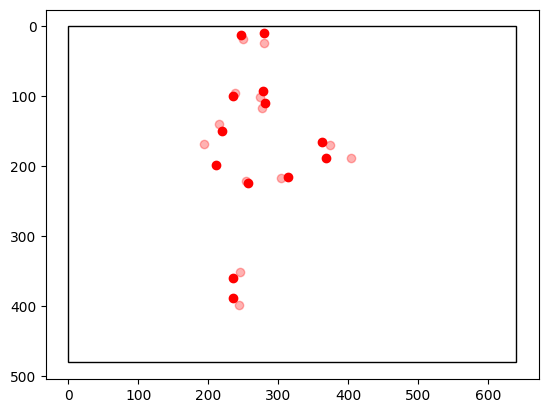

In [10]:

%matplotlib inline
fig = plt.figure()
ax = plt.axes()

vis_utils.plot_2d_points_plt(ax, projected_points[:13], color=(1.0, 0.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[13:26], color=(0.0, 1.0, 0.0))
vis_utils.plot_2d_points_plt(ax, projected_points[26:39], color=(0.0, 0.0, 1.0))

alpha = 0.3
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[:13], color=(1.0, 0.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[13:26], color=(0.0, 1.0, 0.0), alpha=alpha)
vis_utils.plot_2d_points_plt(ax, proj_helper.image_points[26:39], color=(0.0, 0.0, 1.0), alpha=alpha)

ax.add_patch(Rectangle((0, 0), 640, 480, fill=False))

xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.set_xlim(min(0, xlim[0]), max(640, xlim[1]))
ax.set_ylim(min(0, ylim[0]), max(480, ylim[1]))

ax.axes.set_aspect('equal')

plt.gca().invert_yaxis()


In [11]:
dvs_helper.read_events()

importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/stefano/5
importIitYarp trying path: /home/schiavazza/data/hpe/vicon_recordings/stefano/5/ATIS


100%|██████████| 21623/21623 [00:54<00:00, 398.74it/s]


Examining info.log: /home/schiavazza/data/hpe/vicon_recordings/stefano/5/ATIS/info.log


{'ts': array([-2.44609303, -2.44609303, -2.44609303, ..., 11.91309695,
        11.91309695, 11.91309695]),
 'x': array([263, 265, 375, ..., 265, 426, 320], dtype=uint16),
 'y': array([ 25,  28, 377, ...,  56, 398, 319], dtype=uint16),
 'pol': array([ True,  True,  True, ...,  True,  True,  True]),
 'tsOffset': -1686759799.602369}

In [12]:
def get_projected_points(frame_id):
    T_markers = c3d_helper.marker_T_at_frame_vector(frame_id)
    v_points = c3d_helper.get_points_frame(frame_id)
    v_points = v_points[:, :4]
    v_points[:, -1] = 1
    # rot = Rotation.from_matrix(T_markers[:3, :3]).as_rotvec()
    # t = T_markers[:-1, -1]

    # projected_points_cv2, _ = cv2.projectPoints(v_points[:, :-1].transpose(), rot, t, proj_helper.K, proj_helper.D)
    # projected_points_cv2 = projected_points_cv2[:, 0, :]

    projected_points = proj_helper.project_to_frame(
        proj_helper.transform_points(
            v_points, T @ T_markers
            )
        )
    
    return projected_points

In [15]:
# Define the codec and create VideoWriter object
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('output.mp4', fourcc, 20.0, (640, 480))

for i in tqdm(range(1, int(c3d_helper.reader.frame_count))):
    projected_points = get_projected_points(i);
    
    frame = np.zeros((480, 640, 3), dtype=np.uint16)

    ts_start = c3d_helper.frame_times[i]
    frame = utils.extract_frame(dvs_helper.events, ts_start, ts_start + 0.01, (480, 640, 3))

    frame = vis_utils.plot_2d_points(frame, projected_points)
    out.write(frame.astype(np.uint16))

  0%|          | 0/1342 [00:00<?, ?it/s]

 23%|██▎       | 307/1342 [00:16<01:24, 12.20it/s]/home/schiavazza/code/hpe/vicon_recordings/src/utils.py:27: RuntimeWarning: invalid value encountered in divide
  img = ((img / vmax) * 255)
/tmp/ipykernel_630079/1348980232.py:14: RuntimeWarning: invalid value encountered in cast
  out.write(frame.astype(np.uint16))
100%|██████████| 1342/1342 [02:43<00:00,  8.20it/s]


In [16]:
out.release()